<a href="https://colab.research.google.com/github/ReinaKKKK/pos-system/blob/main/0351288_Reina_Kubo_MidTerm_ITS66604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sklearn

In [ ]:
df = pd.read_csv('/content/KAG_conversion_data.csv')
# Display first 5 rows of the tables to have an overview of the dataset
df

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
0,30-34,M,15,7350,1,1.430000,2
1,30-34,M,16,17861,2,1.820000,2
2,30-34,M,20,693,0,0.000000,1
3,30-34,M,28,4259,1,1.250000,1
4,30-34,M,28,4133,1,1.290000,1
...,...,...,...,...,...,...,...
1138,45-49,F,109,1129773,252,358.189997,13
1139,45-49,F,110,637549,120,173.880003,3
1140,45-49,F,111,151531,28,40.289999,2
1141,45-49,F,113,790253,135,198.710001,8


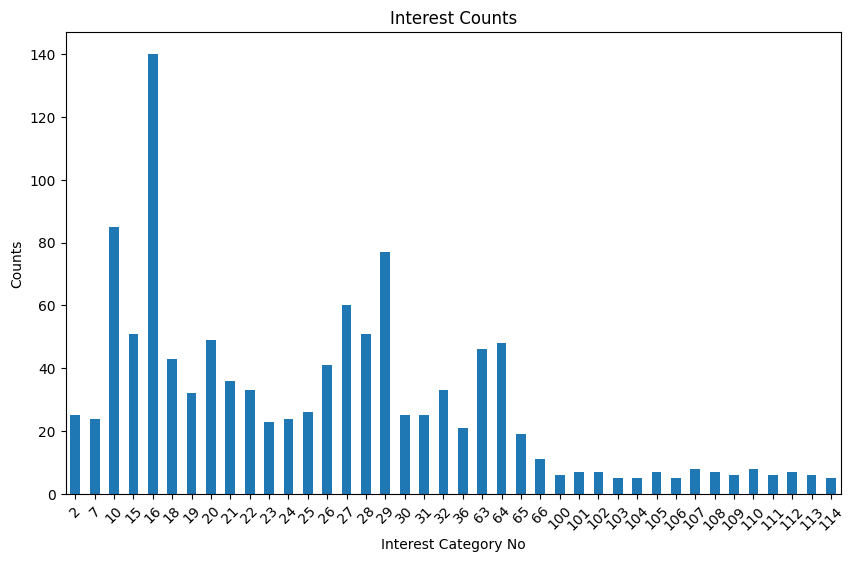

In [ ]:
plt.figure(figsize=(10, 6))
interest_counts = df['interest'].value_counts().sort_index()
interest_counts.plot(kind='bar')

plt.title('Interest Counts')
plt.xlabel('Interest Category No')
plt.ylabel('Counts')

plt.xticks(rotation=45)

plt.show()

# 1 Exploratory Data Analysis

## 1a) missing value

In [ ]:
missing_values = df.isnull().sum()
print('\n_________Missing Values__________')
print(df.isnull().sum())


_________Missing Values__________
age                 0
gender              0
interest            0
Impressions         0
Clicks              0
Spent               0
Total_Conversion    0
dtype: int64


## 1b) Outlier

In [ ]:
# To see the Statistical Data
# Extract more information of the dataset
print('\n_______________INFORMATION_____________________')
print(df.info())
# Display information about the dataset
print('\n__________________________________DESCRIBE______________________________________')
print(df.describe())
# Summary statistics of the dataset


_______________INFORMATION_____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1143 non-null   object 
 1   gender            1143 non-null   object 
 2   interest          1143 non-null   int64  
 3   Impressions       1143 non-null   int64  
 4   Clicks            1143 non-null   int64  
 5   Spent             1143 non-null   float64
 6   Total_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 62.6+ KB
None

__________________________________DESCRIBE______________________________________
          interest   Impressions       Clicks        Spent  Total_Conversion
count  1143.000000  1.143000e+03  1143.000000  1143.000000       1143.000000
mean     32.766404  1.867321e+05    33.390201    51.360656          2.855643
std      26.952131  3.127622e+05    56.89

*   This data analysis investigates the relationship between six characteristics and passenger survival.
*   Input variables = [‘age’, ‘gender’, ‘interest’, ‘Impressions ', 'Clicks’, ‘Spent’].
*   Output variables = [‘Total_Conversion’].
*   In total, only seven columns are used throughout the data analysis process. It is important to obtain more information on these seven columns.

The most important information we received are:


*   age  : DataType (object )
*   gender: DataType(object)
*   interest: DataType(int64), mean(32.76), std(26.95)
*   Impressions: DataType(int64), mean(1.86), std( 3.12)
*   Clicks: DataType(int64), mean(33.39), std(56.89)
*   Spent: DataType(float64), mean(51.36), std(86.90)



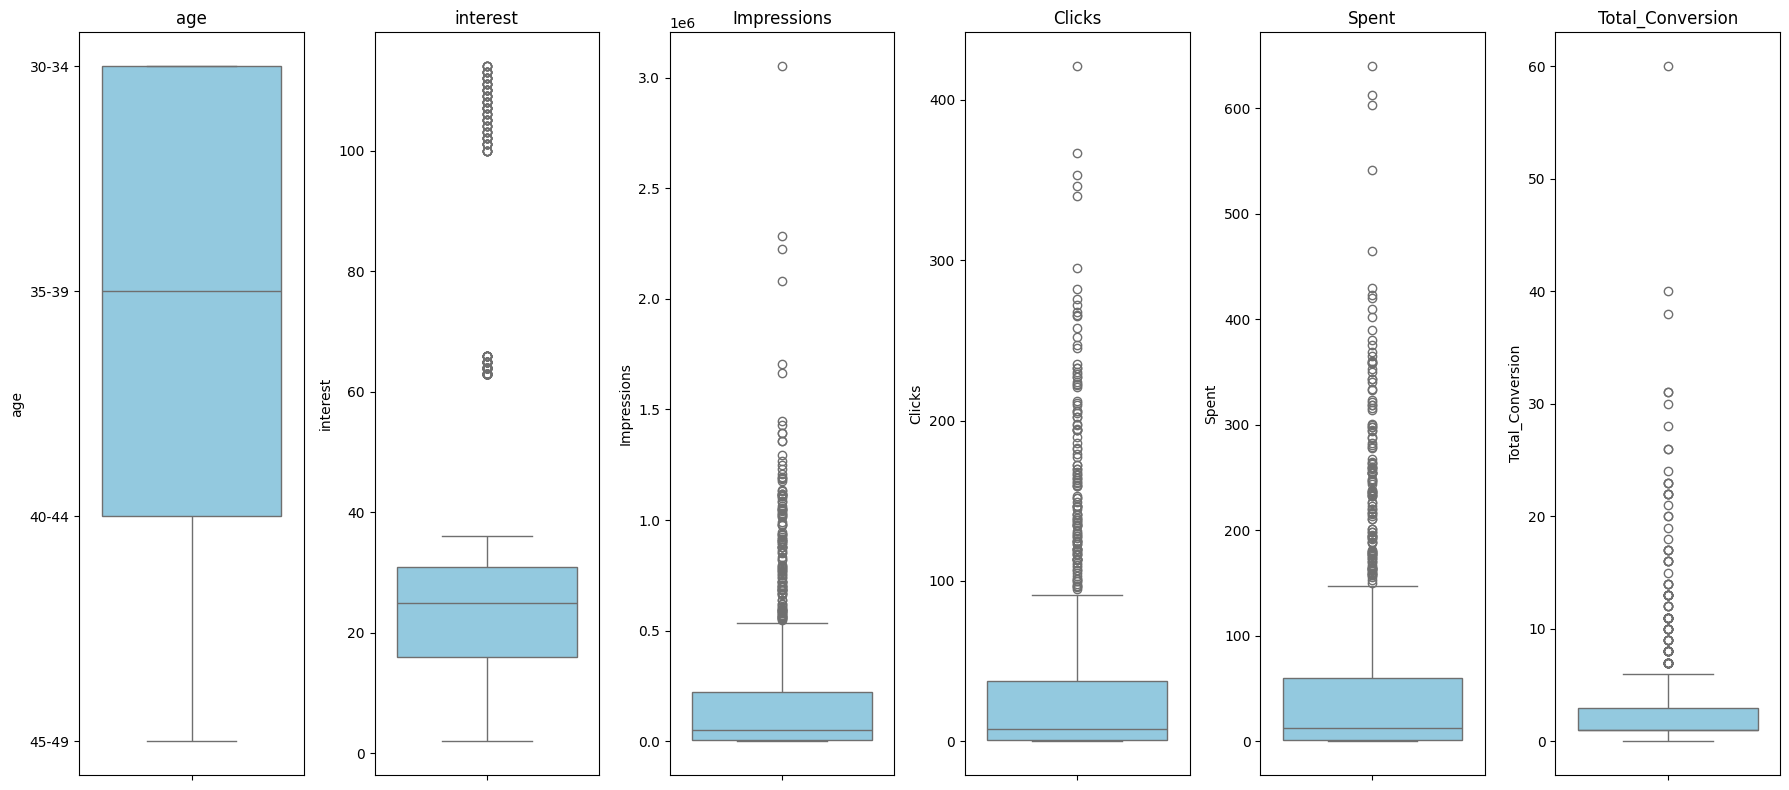

In [ ]:
features = ['age', 'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion']

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(len(features) * 3, 8))

for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i], color='skyblue', orient='v')
    axes[i].set_title(f'{feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

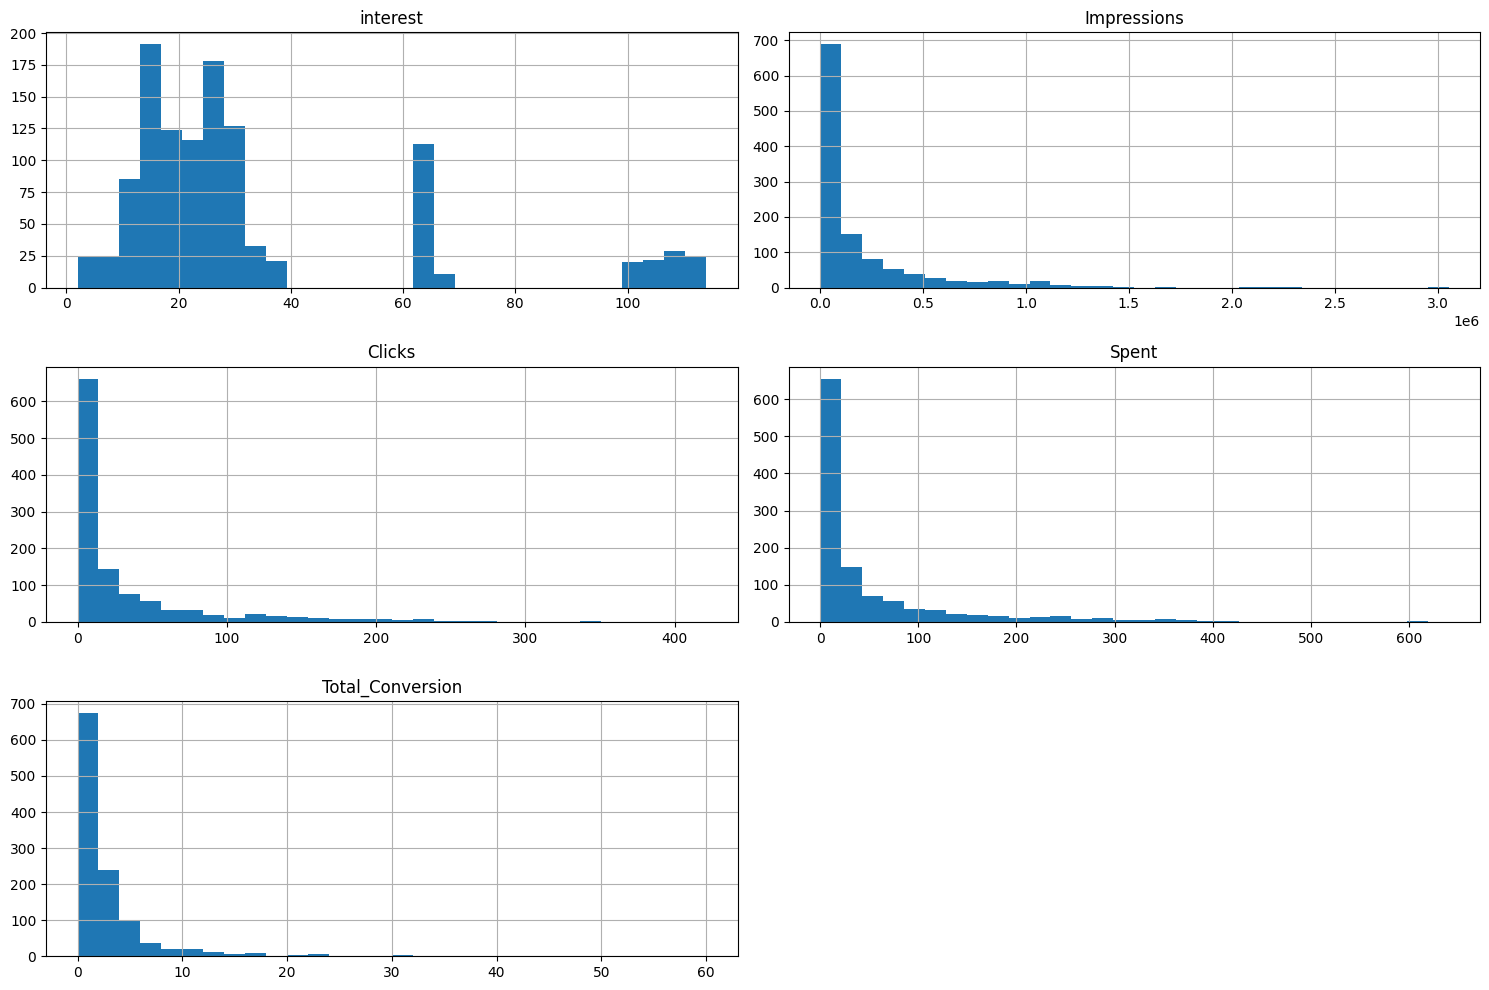

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

We can see a lot of outliers

## Scater plot
##We want to see which numerical feature describe our target

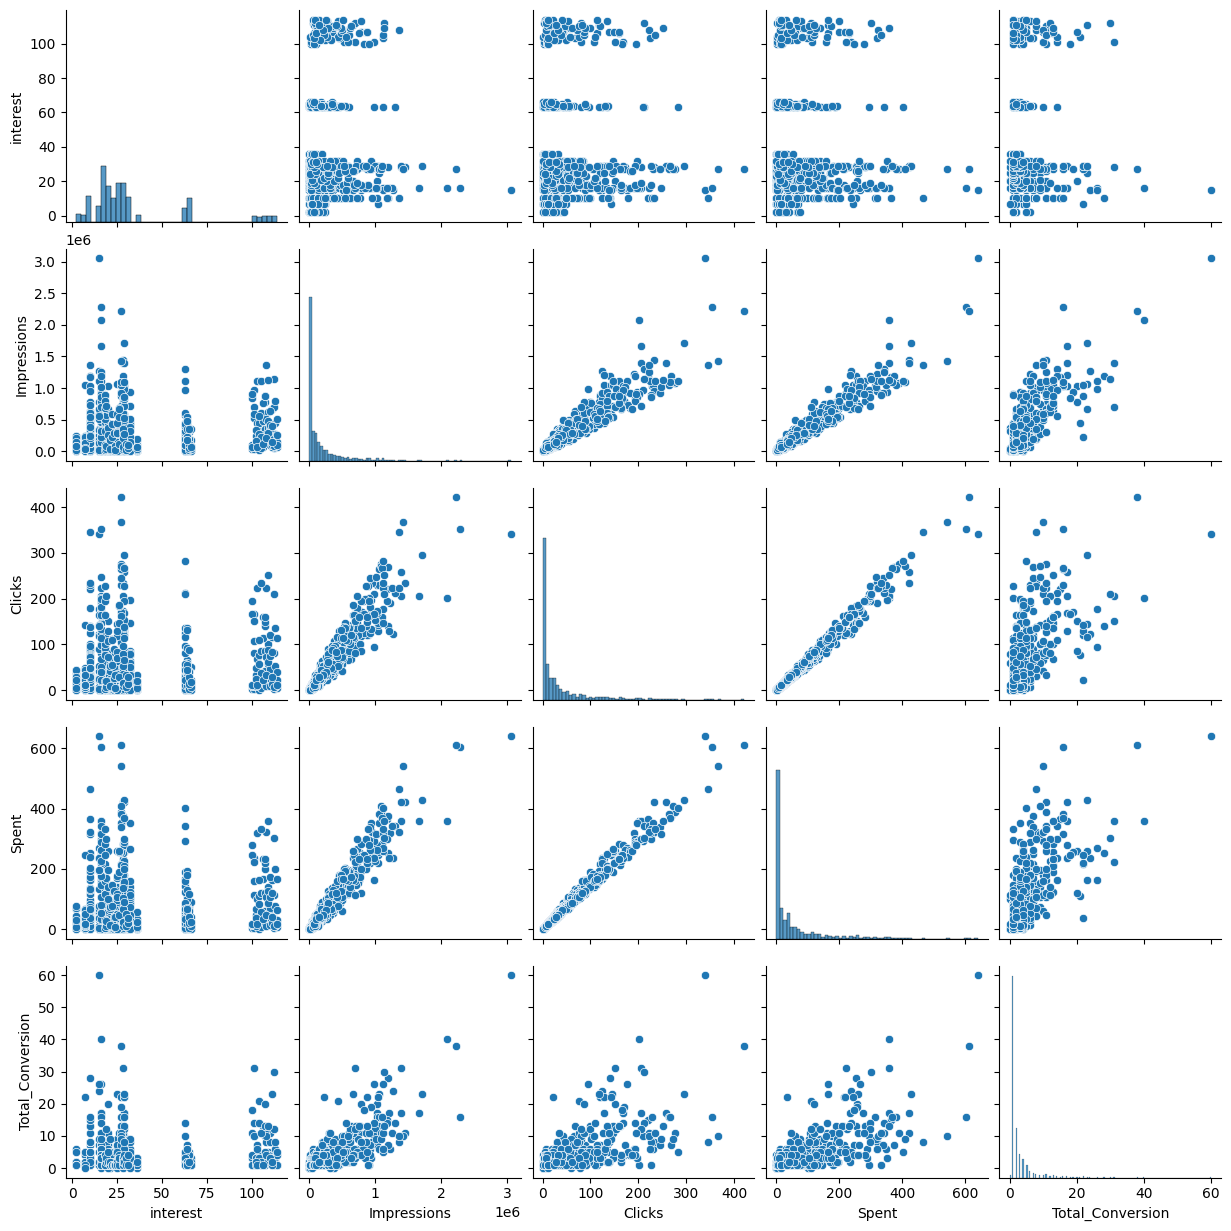

In [ ]:
# Create a Pairplot
import seaborn as sns
sns.pairplot(df)

* Interest: no trend, not helpful

* Impressions: slightly scatted, scattered.

* Clicks: slightly scatted More scattered than Impressions

* Spend: slightly more scattered than scatted Impressions, but less scattered than Clicks

## 1c) Correlation matrix

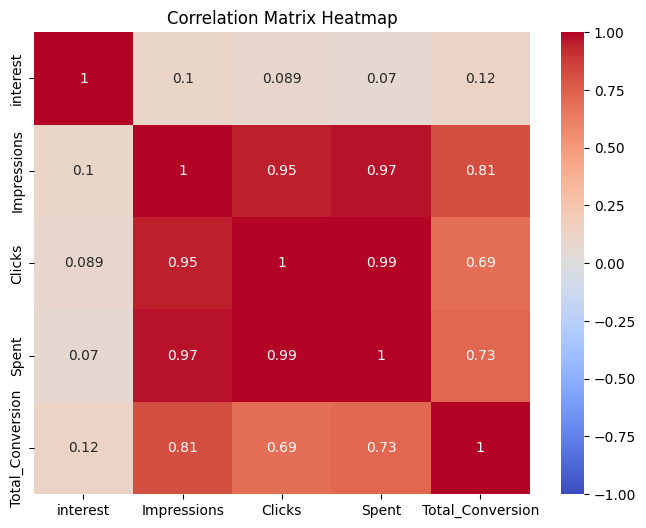

In [ ]:
# Create a Correlation matrix
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation coefficient
correlation = numeric_df.corr()

# Print correlation matrix
import seaborn as sns
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 1d) Encoding (Categorical to numerical)

In [ ]:
# # Get the categorical columns
df_cat = df.select_dtypes(include=['object'])

In [ ]:
df_cat.describe()

,age,gender
count,1143,1143
unique,4,2
top,30-34,M
freq,426,592


In [ ]:
age_counts = df_cat['age'].value_counts()
print('\n_______Age_Counts_______')
age_counts


_______Age_Counts_______


age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64

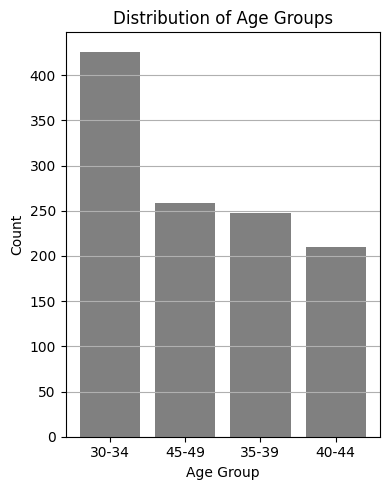

In [ ]:
plt.figure(figsize=(4, 5))
plt.bar(age_counts.index, age_counts.values, color=['gray'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
gender_counts = df_cat['gender'].value_counts()
print('\n_______Gender_Counts_______')
gender_counts


_______Gender_Counts_______


gender
M    592
F    551
Name: count, dtype: int64

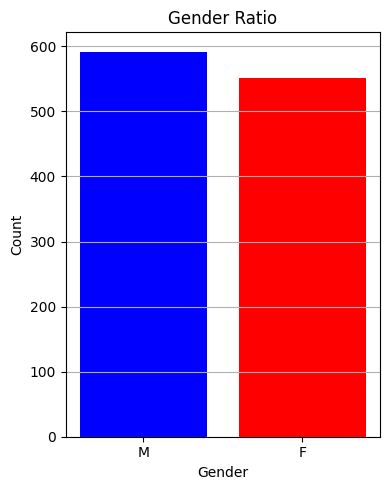

In [ ]:
plt.figure(figsize=(4, 5))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Ratio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'].fillna('Unknown'))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['gender']])
df.drop(columns=['gender'], inplace=True)  # Drop the original 'gender' column
df = pd.concat([df, pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.categories_[0])], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head(5)

,age,interest,Impressions,Clicks,Spent,Total_Conversion,F,M
0,0,15,7350,1,1.43,2,0.0,1.0
1,0,16,17861,2,1.82,2,0.0,1.0
2,0,20,693,0,0.00,1,0.0,1.0
3,0,28,4259,1,1.25,1,0.0,1.0
4,0,28,4133,1,1.29,1,0.0,1.0


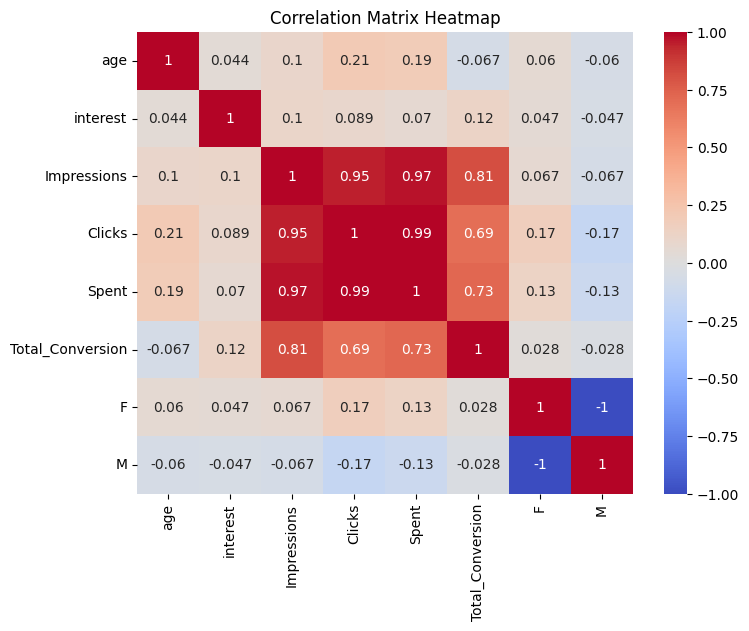

In [ ]:
# Create a Correlation matrix
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation coefficient
correlation = numeric_df.corr()

# Print correlation matrix
import seaborn as sns
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

 # 2 Baseline Regression Model

## 2 a) Define X and y

In [ ]:
df.columns

Index(['age', 'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'F', 'M'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Impressions', 'Clicks', 'Spent']]
y = df['Total_Conversion']

## 2 b)Splitting the train and test

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

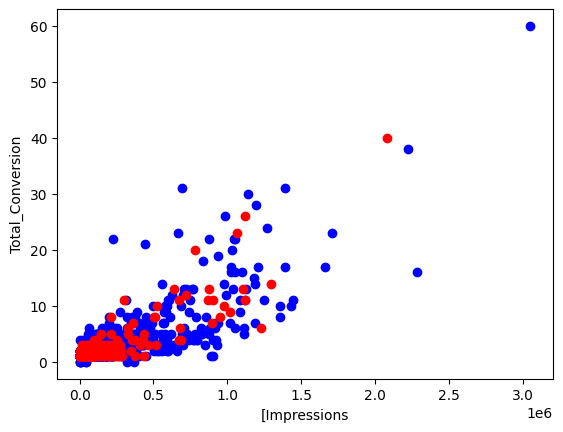

In [ ]:
plt.scatter(X_train['Impressions'], y_train, color='blue')
plt.scatter(X_test['Impressions'], y_test, color='red')
plt.xlabel("[Impressions")
plt.ylabel("Total_Conversion")
plt.show()

## 2c)Train the linear regression model and report the equation of the model with the trained coefficients.

In [ ]:
# Import the class containing the regression method
from sklearn.linear_model import LinearRegression

# Create an instance of the class
lr_model = LinearRegression()

# Fit the instance on the data and then predict the expected value
lr01 = lr_model.fit(X_train, y_train)  # lr01 stores model parameters
y_train_predict = lr01.predict(X_train)
y_test_predict = lr01.predict(X_test)

# Create a DataFrame to store feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr01.coef_})

# Display the coefficients
print(coef_df)


# Retrieving the coefficients
#print ('Coefficients: ', lr01.coef_)
print ('Intercept: ',lr01.intercept_)

       Feature  Coefficient
0  Impressions     0.000028
1       Clicks     0.016119
2        Spent    -0.069234
Intercept:  0.7102952238403843


y = 0.710 + 0 Impressions +  0.016  Clicks + -0.069 Spent

### Evaluation



## 2d) Evaluate the model performance

In [ ]:
#Calculation of Error Using pre-built functions

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_train, y_train_predict)
mse = mean_squared_error(y_train, y_train_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_predict)

print("Mean absolute error: %.2f" %mae)
print("(MSE): %.2f" %mse)
print(" (RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 1.23
(MSE): 5.91
 (RMSE): 2.43
R2-score: 0.71


## K-fold cross validation

In [ ]:
# say, we want to code 5 fold cross validation
from sklearn.model_selection import KFold


kf = KFold(shuffle=True,                       # Whether to shuffle the data before splitting it into folds.
           random_state=72018,                 # An int value used to seed the random number generator for shuffling the data.
           n_splits=5)                         # The number of folds to split the data into

In [ ]:
for train_index, test_index in kf.split(X_train):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  2  3  5  6  7  8  9 10 11] 731
Test index: [ 0  4 17 23 32 33 38 40 49 50] 183

Train index: [ 0  2  3  4  5  7  8  9 10 11] 731
Test index: [ 1  6 12 15 16 25 26 31 46 53] 183

Train index: [ 0  1  3  4  5  6  7  8 10 11] 731
Test index: [ 2  9 19 24 29 30 34 35 41 43] 183

Train index: [ 0  1  2  4  6  8  9 10 11 12] 731
Test index: [ 3  5  7 14 21 22 27 36 39 44] 183

Train index: [ 0  1  2  3  4  5  6  7  9 12] 732
Test index: [ 8 10 11 13 18 20 28 37 42 45] 182



In [ ]:
# say, we want to code 3 fold cross validation
from sklearn.model_selection import KFold


kf3 = KFold(shuffle=True,                           # Whether to shuffle the data before splitting it into folds.
           random_state=72018,                     # An int value used to seed the random number generator for shuffling the data.
           n_splits=3)

In [ ]:
for train_index, test_index in kf3.split(X_train):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 2  3  5  7  8  9 10 11 13 14] 609
Test index: [ 0  1  4  6 12 16 17 23 25 26] 305

Train index: [ 0  1  3  4  5  6  7  8 10 11] 609
Test index: [ 2  9 15 19 24 27 29 30 31 34] 305

Train index: [ 0  1  2  4  6  9 12 15 16 17] 610
Test index: [ 3  5  7  8 10 11 13 14 18 20] 304



In [ ]:
#from sklearn.metrics import r2_score, mean_squared_error

scores01_val = []  # Create a list to store the R^2 scores for each fold
lr = LinearRegression() #Initialize a linear regression model

for train_index, test_index in kf.split(X_train):
    Xcv_train, Xcv_val, ycv_train, ycv_val = (X.iloc[train_index, :],      #The iloc function in pandas is used to select rows or columns from a DataFrame. The first parameter to iloc is the row index or slice, and the second parameter is the column index or slice.
                                                X.iloc[test_index, :],       #The second parameter to iloc is :. This means that all columns in the DataFrame will be selected.
                                                y[train_index],
                                                y[test_index])

    lr01_val = lr.fit(Xcv_train, ycv_train)

    ycv_pred = lr01_val.predict(Xcv_val)

    score01_val = r2_score(ycv_val.values, ycv_pred)

    scores01_val.append(score01_val)

scores01_val

[0.8378515839523969,
 0.8190007885602677,
 0.727942940589855,
 0.8241655272853605,
 0.6737623447939116]

In [ ]:
np.mean(scores01_val)

0.7765446370363583

# 3 Polynomial Regression

## 3a) Experiment with different polynomial degrees (e.g., quadratic, cubic). identify the best degree that captures the non-linearity without overfitting.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# setting up a pipeline
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())
    ])

# parameters for gridsearch
params = {
    'polynomial_features__degree': [1, 2, 3],
}


## 3b) Train the polynomial regression using the best degree.

In [ ]:
# search for the best parameters
lr_poly_grid = GridSearchCV(estimator, params, cv=kf)
lr_poly_grid.fit(X_train, y_train)

# read the best parameters
print("Best score:", lr_poly_grid.best_score_)
print("Best parameters:", lr_poly_grid.best_params_)

Best score: 0.6709169386991485
Best parameters: {'polynomial_features__degree': 1}


In [ ]:
# train a model with best parameter
best_degree = lr_poly_grid.best_params_['polynomial_features__degree']
pf = PolynomialFeatures(degree=best_degree)
lr_poly_best = Pipeline([
    ("make_higher_degree", pf),
    ("linear_regression", LinearRegression())
])

lr_poly_best.fit(X_train, y_train)
print("Training score with best parameters:", lr_poly_best.score(X_train, y_train))

Training score with best parameters: 0.7102418625213134


In [ ]:
# read the model coefficients
coef_df = pd.DataFrame({
    'Feature': lr_poly_best.named_steps["make_higher_degree"].get_feature_names_out(),
    'Coefficient': lr_poly_best.named_steps["linear_regression"].coef_
})

# Display the coefficients
print(coef_df)
# Retrieving the intercept
print ('Intercept: ', lr_poly_best.named_steps["linear_regression"].intercept_)

       Feature  Coefficient
0            1     0.000000
1  Impressions     0.000028
2       Clicks     0.016119
3        Spent    -0.069234
Intercept:  0.7102952238403857


y = 0.710 + 0 Impressions +  0.016  Clicks + -0.069 Spent

In [ ]:
# Predicting on test data
y_test_pred = lr_poly_best.predict(X_test)


In [ ]:
# Calculation of error using pre-built functions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Mean absolute error: %.2f" % mae)
print("Mean squared error: %.2f" % mse)
print("Root mean squared error: %.2f" % rmse)
print("R2-score: %.2f" % r2)

Mean absolute error: 1.02
Mean squared error: 3.48
Root mean squared error: 1.87
R2-score: 0.82


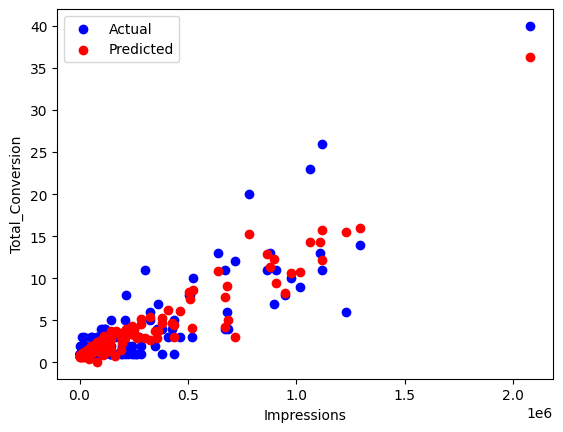

In [ ]:
# Plotting
plt.scatter(X_test['Impressions'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Impressions'], y_test_pred, color='red', label='Predicted')
plt.xlabel("Impressions")
plt.ylabel("Total_Conversion")
plt.legend()
plt.show()

# 4 Regularization

## 4a) Explain the method you will use to find the most suitable regularization strength.

In [ ]:
#Use this function to generate a list of length 10 called alphas for hyperparameter tuning:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas


array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

## 4b) Train a regularized polynomial regression model using the best polynomial degree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

alphas = np.geomspace(1e-9, 1e0, num=10)
s = StandardScaler()
lr_l1 = Lasso(alpha=alphas)

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': [0.0001,0.001,0.05,0.1,1]
    #'ridge_regression__alpha': np.geomspace(4, 20, 30)0.0001,0.001,0.05,0.1,1

}

lr_l1 = GridSearchCV(estimator, params, cv=kf)

In [ ]:
lr01_poly_l1 = lr_l1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.015e+02, tolerance: 1.644e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+02, tolerance: 1.501e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.418e+01, tolerance: 1.588e

In [ ]:
lr01_poly_l1.best_score_, lr01_poly_l1.best_params_

(0.6709575759261176,
 {'lasso_regression__alpha': 0.001, 'polynomial_features__degree': 1})

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Mean absolute error: %.2f" % mae)
print("Mean squared error: %.2f" % mse)
print("Root mean squared error: %.2f" % rmse)
print("R2-score: %.2f" % r2)

Mean absolute error: 1.02
Mean squared error: 3.48
Root mean squared error: 1.87
R2-score: 0.82


In [ ]:
y2_test_lr01_poly_l1_pred = lr01_poly_l1.predict(X_test)

In [ ]:
# Calculation of Error Using pre-built functions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y2_test_lr01_poly_l1_pred)
mse = mean_squared_error(y_test, y2_test_lr01_poly_l1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y2_test_lr01_poly_l1_pred)

print("Mean absolute error: %.2f" % mae)
print("Mean squared error: %.2f" % mse)
print("Root mean squared error: %.2f" % rmse)
print("R2-score: %.2f" % r2)


Mean absolute error: 1.02
Mean squared error: 3.49
Root mean squared error: 1.87
R2-score: 0.82


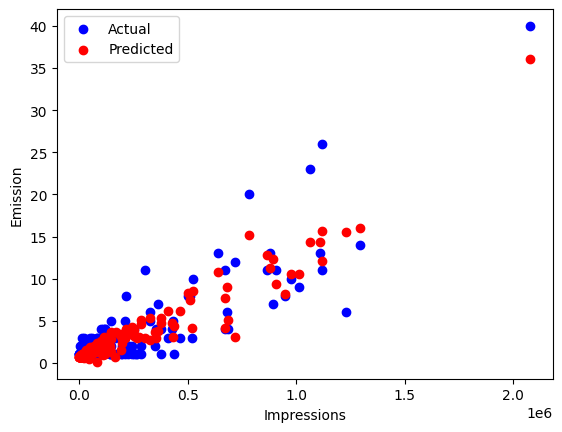

In [ ]:

plt.scatter(X_test['Impressions'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Impressions'], y2_test_lr01_poly_l1_pred, color='red', label='Predicted')
plt.xlabel("Impressions")
plt.ylabel("Emission")
plt.legend()
plt.show()